# Importing required libraries and loading data

In [1]:
# important python libraries for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv("vgsales.csv") 
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Removing duplicate and missing-value rows

In [3]:
pd.DataFrame(df.isnull().sum(),columns = ["missing percent"])

,missing percent
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [4]:
print("Dataset shape before cleaning: ", df.shape)
# Droping rows with any missing values
df.dropna(how="any", inplace=True)
print("Dataset shape after cleaning: ", df.shape)
# Dropping duplicate values
df.drop_duplicates(inplace=True)
print("Dataset shape after dropping duplicate values: ", df.shape)

Dataset shape before cleaning:  (16598, 11)
Dataset shape after cleaning:  (16291, 11)
Dataset shape after dropping duplicate values:  (16291, 11)


# Rename columns and check missing value percentage

In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
# Changing columns name into lower-case
df.columns = map(lambda x: x.lower(), df.columns)
# Now renaming some columns for better clarity
df.rename(columns={"na_sales":"north_usa_sales", "eu_sales":"europe_sales", "jp_sales":"japan_sales"}, inplace=True)

In [7]:
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher',
       'north_usa_sales', 'europe_sales', 'japan_sales', 'other_sales',
       'global_sales'],
      dtype='object')

# Feature Transformation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             16291 non-null  int64  
 1   name             16291 non-null  object 
 2   platform         16291 non-null  object 
 3   year             16291 non-null  float64
 4   genre            16291 non-null  object 
 5   publisher        16291 non-null  object 
 6   north_usa_sales  16291 non-null  float64
 7   europe_sales     16291 non-null  float64
 8   japan_sales      16291 non-null  float64
 9   other_sales      16291 non-null  float64
 10  global_sales     16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [9]:
# feature transformation
df['year'] = df['year'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             16291 non-null  int64  
 1   name             16291 non-null  object 
 2   platform         16291 non-null  object 
 3   year             16291 non-null  int32  
 4   genre            16291 non-null  object 
 5   publisher        16291 non-null  object 
 6   north_usa_sales  16291 non-null  float64
 7   europe_sales     16291 non-null  float64
 8   japan_sales      16291 non-null  float64
 9   other_sales      16291 non-null  float64
 10  global_sales     16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


# Exploring Data for different questions

In [11]:
# To find game with highest global sales
max_sold = df['global_sales'].max()
hgs_game = df[df['global_sales'] == max_sold]
hgs_game[["name","global_sales","year"]]

,name,global_sales,year
0,Wii Sports,82.74,2006


In [12]:
# To find game with lowest global sales
min_sold = df['global_sales'].min()
lgs_game = df[df['global_sales'] == min_sold]
lgs_game[["name","global_sales","year"]]

,name,global_sales,year
15980,Turok,0.01,2008
15981,Coven and Labyrinth of Refrain,0.01,2016
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01,2016
15983,Dragon Zakura DS,0.01,2007
15984,Chameleon: To Dye For!,0.01,2006
...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01,2002
16594,Men in Black II: Alien Escape,0.01,2003
16595,SCORE International Baja 1000: The Official Game,0.01,2008
16596,Know How 2,0.01,2010


# To find year wise sales

In [13]:
year_wise_sales = pd.pivot_table(df, index='year', aggfunc=np.sum)
year_wise_sales.head()

,europe_sales,global_sales,japan_sales,north_usa_sales,other_sales,rank
year,,,,,,
1980,0.67,11.38,0.00,10.59,0.12,29826
1981,1.96,35.77,0.00,33.40,0.32,190488
1982,1.65,28.86,0.00,26.92,0.31,149186
1983,0.80,16.79,8.10,7.76,0.14,56759
1984,2.10,50.36,14.27,33.28,0.70,22911


# To visualize global average game sales year-wise

Text(0.5, 1.0, 'Year wise global game sales')

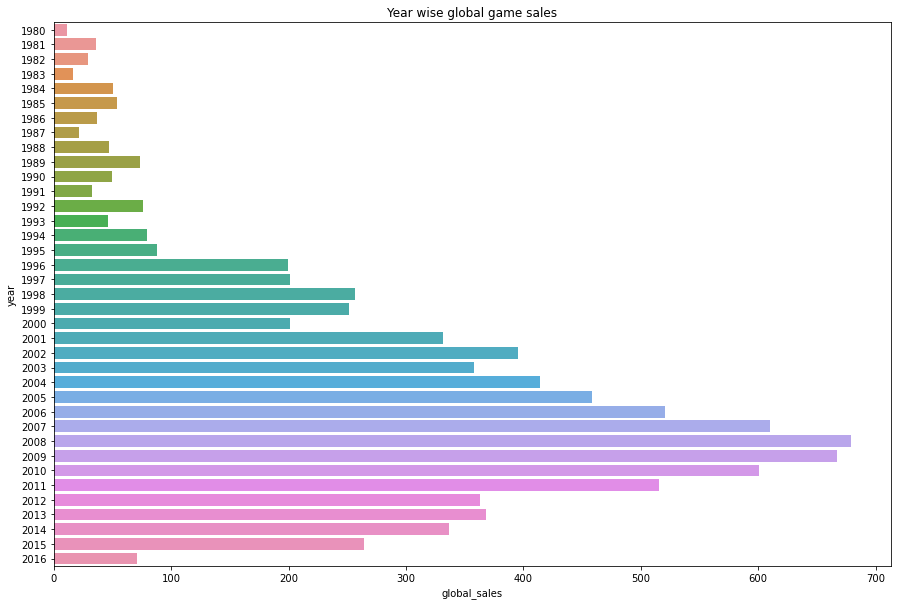

In [14]:
plt.rcParams['figure.figsize'] = (15, 10)
year_wise_game_sales = pd.pivot_table(df, index='year', values='global_sales', aggfunc=np.sum).head(37)
sns.barplot(year_wise_game_sales["global_sales"], year_wise_game_sales.index, orient='h')
plt.title("Year wise global game sales")

# Top 10 platform wise global sales

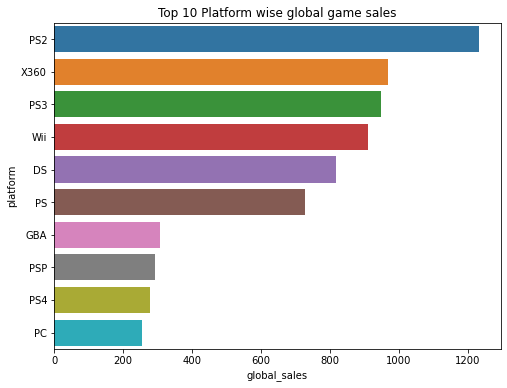

In [15]:
plt.rcParams['figure.figsize'] = (8, 6)
platform_wise_game_sales = pd.pivot_table(df, index='platform', values='global_sales', aggfunc=np.sum)
platform_wise_game_sales = platform_wise_game_sales.sort_values(by='global_sales', ascending=False).head(10)
sns.barplot(platform_wise_game_sales['global_sales'], platform_wise_game_sales.index, orient='h')
plt.title("Top 10 Platform wise global game sales")
plt.show()

# Top 10 genre wise global sales

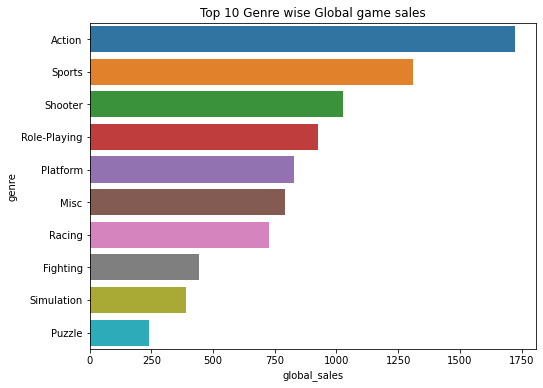

In [16]:
plt.rcParams['figure.figsize'] = (8, 6)
genre_wise_game_sales = pd.pivot_table(df, index='genre', values='global_sales', aggfunc=np.sum)
genre_wise_game_sales = genre_wise_game_sales.sort_values(by='global_sales', ascending=False).head(10)
sns.barplot(genre_wise_game_sales['global_sales'], genre_wise_game_sales.index, orient='h')
plt.title("Top 10 Genre wise Global game sales")
plt.show()

# Listing publisher wise top global game sales

In [17]:
df.head()

,rank,name,platform,year,genre,publisher,north_usa_sales,europe_sales,japan_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


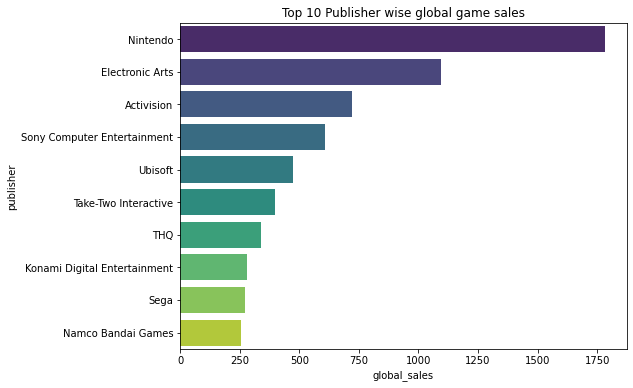

In [18]:
plt.rcParams['figure.figsize'] = (8, 6)
publisher_wise_game_sales = pd.pivot_table(df, index='publisher', values='global_sales', aggfunc=np.sum)
publisher_wise_game_sales = publisher_wise_game_sales.sort_values(by='global_sales', ascending=False).head(10)
sns.barplot(publisher_wise_game_sales['global_sales'], publisher_wise_game_sales.index, orient='h', palette='viridis')
plt.title("Top 10 Publisher wise global game sales")
plt.show()

# Let's find Top 5 Best game's from Top Action Genre

,name,global_sales
16,Grand Theft Auto V,21.40
17,Grand Theft Auto: San Andreas,20.81
24,Grand Theft Auto: Vice City,16.15
38,Grand Theft Auto III,13.10
45,Pokemon HeartGold/Pokemon SoulSilver,11.90


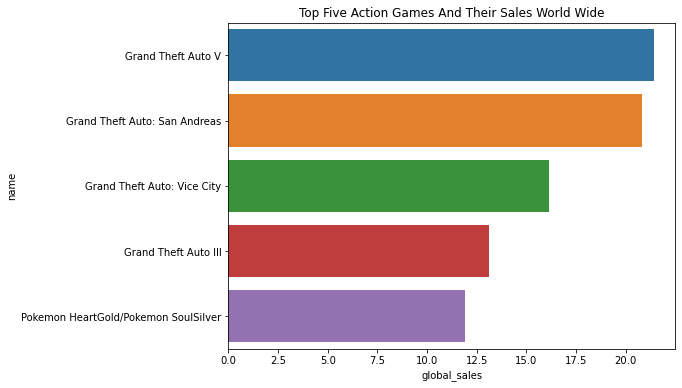

In [19]:
plt.rcParams['figure.figsize'] = (8,6)
top_five_action_games = df[df['genre']=='Action'][['name', 'global_sales']]
top_five_action_games = top_five_action_games.sort_values(by='global_sales', ascending=False)
top_five_action_games =  top_five_action_games.drop_duplicates(['name']).head(5)
sns.barplot(top_five_action_games['global_sales'], top_five_action_games['name'])
plt.title("Top Five Action Games And Their Sales World Wide")
top_five_action_games

# Which is the highest sold Game in North_USA

In [20]:
df.head()

,rank,name,platform,year,genre,publisher,north_usa_sales,europe_sales,japan_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [21]:
df[df['north_usa_sales'] == df['north_usa_sales'].max()][["name","north_usa_sales"]]

,name,north_usa_sales
0,Wii Sports,41.49


# Total Sale's Year Wise

Text(0, 0.5, 'avg global_sales')

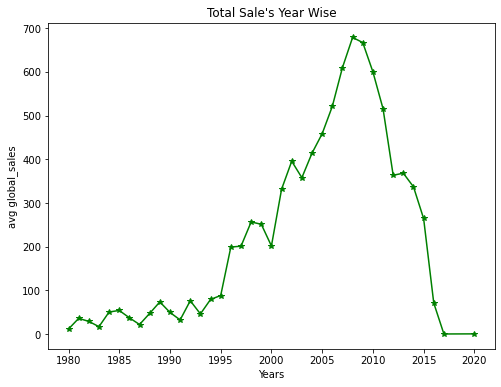

In [22]:
tot_sales_year_wise = pd.pivot_table(df, index='year', values='global_sales', aggfunc=np.sum)
plt.plot(tot_sales_year_wise.index, tot_sales_year_wise['global_sales'], color='g', marker='*')
plt.title("Total Sale's Year Wise")
plt.xlabel("Years")
plt.ylabel("avg global_sales")

# Re-prepare data for model

In [23]:
df_copy = df.copy()

In [24]:
def data_encode(x_data):
    for i in x_data.columns:
        x_data[i] = x_data[i].factorize()[0]
        
    return x_data

x_data = df_copy.drop('global_sales', axis=1)
y_data = df_copy['global_sales']
x_data = data_encode(x_data)

In [29]:
x_data.head()

,rank,name,platform,year,genre,publisher,north_usa_sales,europe_sales,japan_sales,other_sales
0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1
2,2,2,0,2,2,0,2,2,2,2
3,3,3,0,3,0,0,3,3,3,3
4,4,4,2,4,3,0,4,4,4,4


# Model Building

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

In [33]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(11403, 10) (4888, 10) (11403,) (4888,)


# Linear Regression

In [35]:
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)
ypred = lr_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest, ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) / (n-p-1))
print("r2_score for Linear Reg model : ", r2_score(ytest,ypred))
print("adjusted_r2_score Value       : ", adjusted_r2_score)                         
print("MSE for Linear Regression     : ", mean_squared_error(ytest,ypred))

r2_score for Linear Reg model :  0.3928039327593644
adjusted_r2_score Value       :  0.3915589131423034
MSE for Linear Regression     :  1.199725953705156


# Random Forest Regression

In [36]:
rf_model = RandomForestRegressor(n_estimators=200,min_samples_split=20,random_state=43)
rf_model.fit(xtrain, ytrain)
ypred = rf_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest, ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) / (n-p-1))
print("r2_score for Linear Reg model : ", r2_score(ytest,ypred))
print("adjusted_r2_score Value       : ", adjusted_r2_score)                         
print("MSE for Linear Regression     : ", mean_squared_error(ytest,ypred))

r2_score for Linear Reg model :  0.9951435656927355
adjusted_r2_score Value       :  0.995133607861472
MSE for Linear Regression     :  0.009595566564465764
